### EDA on Movie Poster dataset

In [13]:
import os
import pandas as pd
import requests
from PIL import Image 
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('movies_dataset_final.csv')

In [8]:
print(df.info())
print(df.head())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28880 entries, 0 to 28879
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28880 non-null  int64  
 1   tconst      28880 non-null  object 
 2   title       28879 non-null  object 
 3   year        28880 non-null  object 
 4   genre       28880 non-null  object 
 5   director    28620 non-null  object 
 6   actors      28880 non-null  object 
 7   plot        28601 non-null  object 
 8   country     28880 non-null  object 
 9   awards      28880 non-null  object 
 10  poster      27938 non-null  object 
 11  rating      28880 non-null  float64
 12  votes       28880 non-null  int64  
 13  type        28880 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB
None
   Unnamed: 0      tconst                        title  year           genre  \
0           1   tt3608918                    Azzurrina  2023          Horror   
1      

THE COLUMN UNNAMED: 0 LOOKS LIKE AN INDEX. WE SHOULD CONSIDER DROPPING IT 

In [9]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Unnamed: 0    0.000000
tconst        0.000000
title         0.003463
year          0.000000
genre         0.000000
director      0.900277
actors        0.000000
plot          0.966066
country       0.000000
awards        0.000000
poster        3.261773
rating        0.000000
votes         0.000000
type          0.000000
dtype: float64


In [10]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

### b. Handling Missing Data

In [12]:
# Drop rows with missing poster images
df = df.dropna(subset=['poster'])
print("Remaining rows:", len(df))


Remaining rows: 27938


2. Exploring the Target Variable: Genre

a. Frequency Counts
Value counts to see how many samples we have for each genre:

In [35]:
# Print frequency counts for the 'genre' column
genre_counts = df['genre'].value_counts().head(20)
print("Genre Frequency Counts:")
print(genre_counts)


Genre Frequency Counts:
genre
Documentary                        6943
Drama                              4890
Comedy                             1221
Comedy, Drama                       812
Thriller                            558
Drama, Romance                      536
Documentary, Biography              514
Documentary, Music                  503
Action                              333
Horror                              323
Drama, Thriller                     316
Comedy, Drama, Romance              315
Documentary, Sport                  307
Romance                             303
Documentary, Biography, History     265
Documentary, History                258
Documentary, Biography, Music       247
Drama, Family                       218
Documentary, Drama                  206
Crime, Drama                        195
Name: count, dtype: int64


In [18]:
# Split the 'country' column by comma if there are multiple countries per movie
df['country_list'] = df['country'].str.split(', ')

# Explode the list so each country gets its own row
countries_exploded = df.explode('country_list')

# Print frequency counts for the individual countries
country_counts = countries_exploded['country_list'].value_counts()
print("Country Frequency Counts:")
print(country_counts)


Country Frequency Counts:
country_list
United States      9244
India              4311
United Kingdom     2285
Canada             1260
France             1172
                   ... 
Solomon Islands       1
Cape Verde            1
Korea                 1
Saint Helena          1
American Samoa        1
Name: count, Length: 208, dtype: int64


In [19]:
low_count_genres = genre_counts[genre_counts < 100]
print("Genres with few samples:\n", low_count_genres)


Genres with few samples:
 genre
Musical                         99
Mystery                         84
Animation                       84
Horror, Thriller                79
Comedy, Crime, Drama            78
                                ..
Animation, Short, Drama          1
Comedy, Crime, Music             1
Documentary, History, Sci-Fi     1
Comedy, Talk-Show                1
Drama, Sport, Thriller           1
Name: count, Length: 750, dtype: int64


In [16]:
from PIL import Image
import os

def display_sample_images(image_paths, num_images=5):
    for path in image_paths[:num_images]:
        try:
            img = Image.open(path)
            plt.figure()
            plt.imshow(img)
            plt.title(os.path.basename(path))
            plt.axis('off')
        except Exception as e:
            print(f"Error loading {path}: {e}")
    plt.show()

# Display a few sample images:
display_sample_images(df['poster'].tolist())


Error loading https://m.media-amazon.com/images/M/MV5BOWQ5MGQzNzctY2NiNC00M2U0LWE1NGMtYjUwMGEyOWFjZDdhXkEyXkFqcGdeQXVyNzMxMzg4OQ@@._V1_SX300.jpg: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/M/MV5BOWQ5MGQzNzctY2NiNC00M2U0LWE1NGMtYjUwMGEyOWFjZDdhXkEyXkFqcGdeQXVyNzMxMzg4OQ@@._V1_SX300.jpg'
Error loading https://m.media-amazon.com/images/M/MV5BNDIwYzU1ZjQtMGYwMS00ZjkyLTljYmMtNWViN2NkMTA4OTA0XkEyXkFqcGdeQXVyMzM0NjI0ODE@._V1_SX300.jpg: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/M/MV5BNDIwYzU1ZjQtMGYwMS00ZjkyLTljYmMtNWViN2NkMTA4OTA0XkEyXkFqcGdeQXVyMzM0NjI0ODE@._V1_SX300.jpg'
Error loading https://m.media-amazon.com/images/M/MV5BODE4NGNkNjItYTRlMy00ZGE5LTgzMWUtNzk5OTJmM2VhYzhiXkEyXkFqcGdeQXVyNDExMDc3MA@@._V1_SX300.jpg: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/M/MV5BODE4NGNkNjItYTRlMy00ZGE5LTgzMWUtNzk5OTJmM2VhYzhiXkEyXkFqcGdeQXVyNDExMDc3MA@@._V1_SX300.jpg'
Error loading https://m.media-amazon.com/images/M/MV5BYWY0NTUxY2EtYTBlNC00ZD

3. Exploring Other Metadata (e.g., Country)

    a. Analyze Country Distribution
Countries might have multiple values per movie.

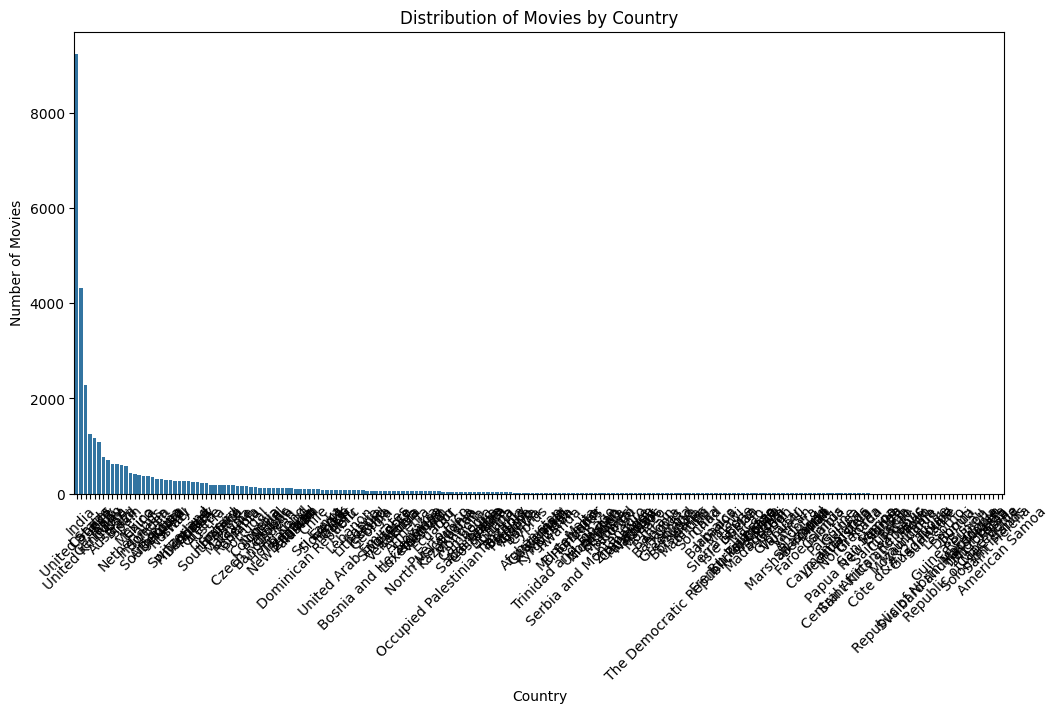

In [20]:
# If the country column contains multiple countries per row (e.g., "USA, UK"), you might split them:
df['country_list'] = df['country'].str.split(', ')
countries_exploded = df.explode('country_list')
country_counts = countries_exploded['country_list'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Distribution of Movies by Country")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


Dominant Countries:

- The United States has by far the largest representation, followed by a small number of other countries with a sizable count (e.g., UK, France, Germany).
- This heavy skew means your dataset may not be balanced if you plan to use “country” as a feature in a model.

Long Tail of Under-Represented Countries:

- A large number of countries have very few entries (sometimes fewer than 10 or 20 movies).
- If you plan to keep country-level detail in your analysis or model, these small-sample countries might cause issues like overfitting or poor generalization.

Potential Next Steps:

- Filter or Merge: Consider setting a threshold (e.g., keep only countries with at least 50 or 100 movies) or merging under-represented countries into an “Other” category.
- Data Augmentation: If you have enough resources, you could try to acquire more data for under-represented countries to balance the distribution.
- Stratified Splitting: If “country” is important, ensure you use a stratified train-test split (if possible) to maintain a consistent distribution across your splits.
- Feature Engineering: Instead of using the exact country, you could group countries by region or language to reduce the skew and still retain some meaningful geographical context.

4. Image Data Considerations
Since the project focuses on computer vision:

a. Sampling and Inspecting Poster Images

In [23]:
from PIL import Image
import os

def display_sample_images(image_paths, num_images=5):
    for path in image_paths[:num_images]:
        try:
            img = Image.open(path)
            plt.figure()
            plt.imshow(img)
            plt.title(os.path.basename(path))
            plt.axis('off')
        except Exception as e:
            print(f"Error loading {path}: {e}")
    plt.show()

# Display a few sample images:
display_sample_images(df['poster'].tolist())


Error loading https://m.media-amazon.com/images/M/MV5BOWQ5MGQzNzctY2NiNC00M2U0LWE1NGMtYjUwMGEyOWFjZDdhXkEyXkFqcGdeQXVyNzMxMzg4OQ@@._V1_SX300.jpg: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/M/MV5BOWQ5MGQzNzctY2NiNC00M2U0LWE1NGMtYjUwMGEyOWFjZDdhXkEyXkFqcGdeQXVyNzMxMzg4OQ@@._V1_SX300.jpg'
Error loading https://m.media-amazon.com/images/M/MV5BNDIwYzU1ZjQtMGYwMS00ZjkyLTljYmMtNWViN2NkMTA4OTA0XkEyXkFqcGdeQXVyMzM0NjI0ODE@._V1_SX300.jpg: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/M/MV5BNDIwYzU1ZjQtMGYwMS00ZjkyLTljYmMtNWViN2NkMTA4OTA0XkEyXkFqcGdeQXVyMzM0NjI0ODE@._V1_SX300.jpg'
Error loading https://m.media-amazon.com/images/M/MV5BODE4NGNkNjItYTRlMy00ZGE5LTgzMWUtNzk5OTJmM2VhYzhiXkEyXkFqcGdeQXVyNDExMDc3MA@@._V1_SX300.jpg: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/M/MV5BODE4NGNkNjItYTRlMy00ZGE5LTgzMWUtNzk5OTJmM2VhYzhiXkEyXkFqcGdeQXVyNDExMDc3MA@@._V1_SX300.jpg'
Error loading https://m.media-amazon.com/images/M/MV5BYWY0NTUxY2EtYTBlNC00ZD

In [29]:
import os
import pandas as pd

# Load your dataset
df = pd.read_csv("movies_dataset_final.csv")
df = df.dropna(subset=['poster'])  # Ensure there are no missing poster values

# Function to check if a file exists
def is_valid_local_path(path):
    return os.path.exists(path)

# Apply the function and create a new column with the validity status
df['poster_valid'] = df['poster'].apply(is_valid_local_path)

# Check the number of valid vs. invalid paths
print(df['poster_valid'].value_counts())


poster_valid
False    27938
Name: count, dtype: int64


In [30]:
print(df['poster'].head(10))


0     https://m.media-amazon.com/images/M/MV5BOWQ5MG...
1     https://m.media-amazon.com/images/M/MV5BNDIwYz...
2     https://m.media-amazon.com/images/M/MV5BODE4NG...
3     https://m.media-amazon.com/images/M/MV5BYWY0NT...
4     https://m.media-amazon.com/images/M/MV5BN2FjZD...
5     https://m.media-amazon.com/images/M/MV5BNmU0ZT...
6     https://m.media-amazon.com/images/M/MV5BNDYxZW...
8     https://m.media-amazon.com/images/M/MV5BZDcwZj...
9     https://m.media-amazon.com/images/M/MV5BYmI4Y2...
10    https://m.media-amazon.com/images/M/MV5BMWY2Y2...
Name: poster, dtype: object


In [31]:
import requests

def is_valid_url(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"
    }
    try:
        # Use a GET request with streaming so we don't download the entire image.
        response = requests.get(url, headers=headers, stream=True, timeout=5)
        # If status code is less than 400, consider the URL valid.
        return response.status_code < 400
    except requests.RequestException:
        return False

# Apply the updated function to the poster column
df['poster_valid'] = df['poster'].apply(is_valid_url)
print(df['poster_valid'].value_counts())


KeyboardInterrupt: 

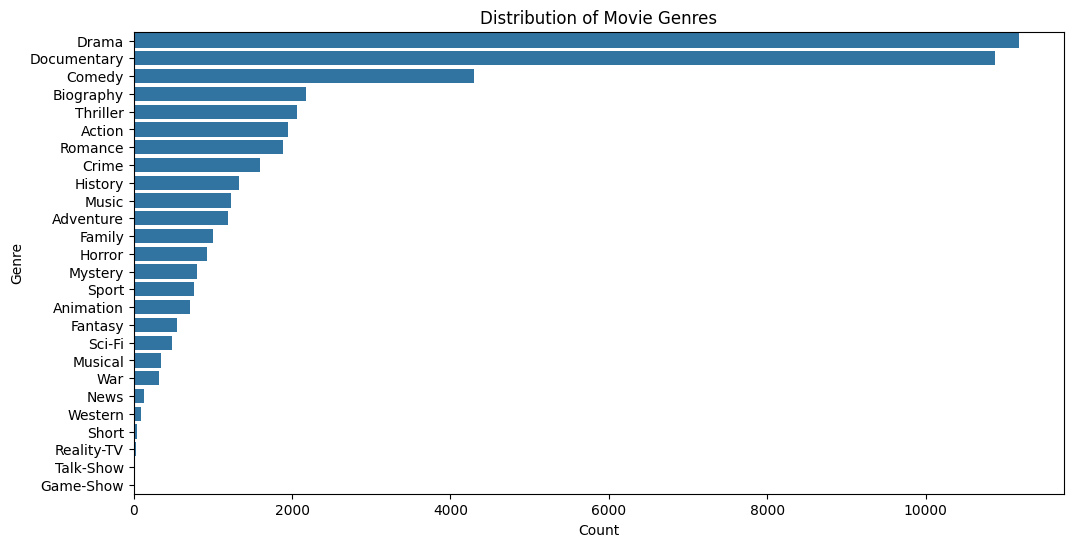

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# Split the 'genre' column into lists. Adjust the delimiter if needed.
df['genre_list'] = df['genre'].str.split(',\s*')

# Explode the list so each row is a single genre
genres_exploded = df.explode('genre_list')

# Plot a horizontal bar chart of genre counts
plt.figure(figsize=(12,6))
sns.countplot(y='genre_list', data=genres_exploded, 
              order=genres_exploded['genre_list'].value_counts().index)
plt.title("Distribution of Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


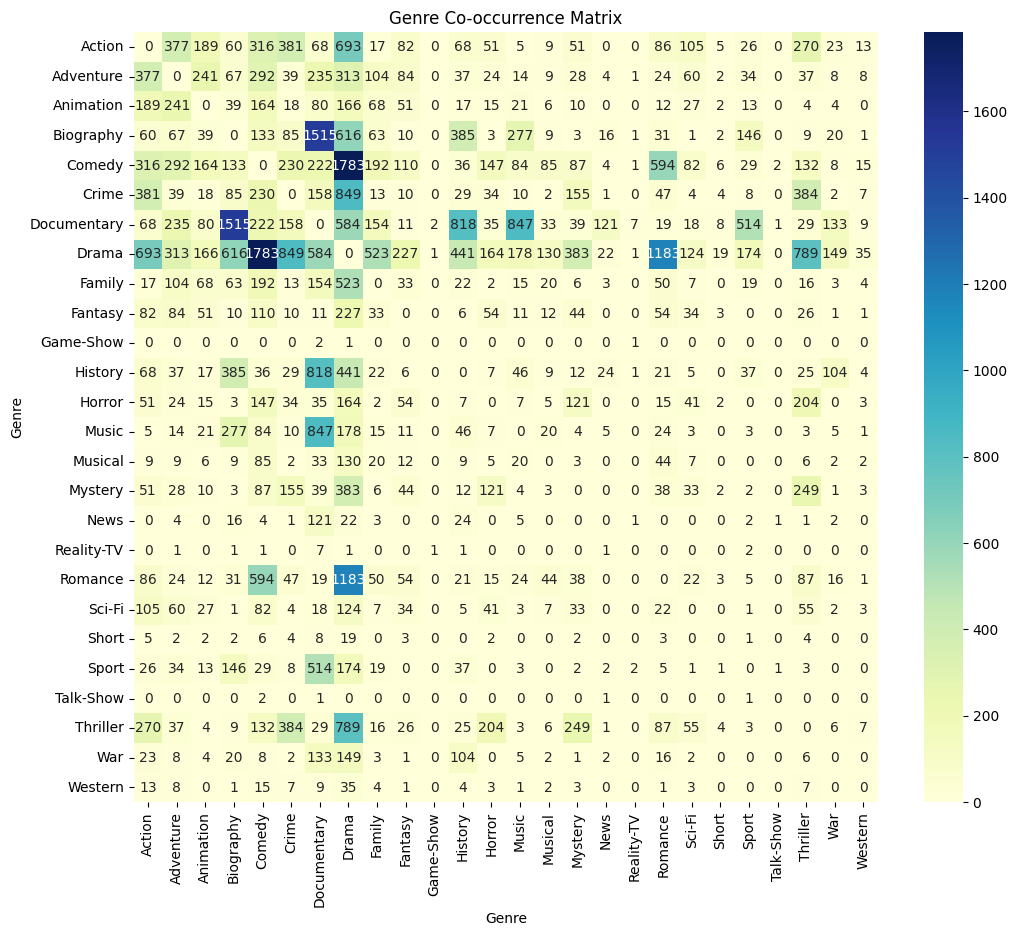

In [33]:
import numpy as np

# Get a sorted list of all unique genres
unique_genres = sorted(set(g for sublist in df['genre_list'].dropna() for g in sublist))

# Map each genre to an index
genre_to_index = {genre: i for i, genre in enumerate(unique_genres)}

# Initialize a matrix for co-occurrence counts
co_occurrence = np.zeros((len(unique_genres), len(unique_genres)), dtype=int)

# Populate the co-occurrence matrix
for genres in df['genre_list'].dropna():
    # Consider unique pairs within the movie genres
    for g1 in genres:
        for g2 in genres:
            if g1 != g2:
                i, j = genre_to_index[g1], genre_to_index[g2]
                co_occurrence[i, j] += 1

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(co_occurrence, xticklabels=unique_genres, yticklabels=unique_genres,
            annot=True, fmt="d", cmap="YlGnBu")
plt.title("Genre Co-occurrence Matrix")
plt.xlabel("Genre")
plt.ylabel("Genre")
plt.show()
